# Exploratory Data Analysis (EDA)
This notebook contains an initial exploratory analysis of the dataset 'Klienci_DB.csv' to understand its structure, distributions, and potential insights.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plot style
plt.style.use("ggplot")
sns.set_theme(style="whitegrid")

In [ ]:
# Load the dataset
df = pd.read_csv("/Users/wyko/churn-prediction-project/data/raw/Klienci_DB.csv")

## 1. Dataset Overview
basic information about the structure of the dataset.

In [ ]:
# Show shape, column names, and types
print("Shape: ", df.shape)
print("Columns: ", df.columns.tolist())
print("\nData types\n", df.dtypes)

# More detailed info
df.info()

# Preview first 5 rows
df.head()

## 2. Missing Values
Check for any missing or null values in the dataset.

In [ ]:
# Count of missing values per column
df.isnull().sum()

## 3.Descriptive Statistics
Summary of numerical features in the dataset.

In [ ]:
# Summary statistics 
df.describe()

## 4. Variable Distributions
Let's explore the distribution of key numerical features.

In [ ]:
# Age distribution
df["wiek"].hist(bins=10, color="skyblue", edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Clinets")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Age Distribution 

The age distribution of clients appears to be relatively uniform, with a slightly higher number of clinets at the youngest (18-25) and oldest (75-80) age ranges.

- No major skewness or anomalies are present.
- The dataset includes a well-balanced range of ages between 18 and 80.
- This indicates good representation across different age groups for further analysis.

Overall, the age data apperas to be clean and evenly distributed.

In [ ]:
#Monthly income boxplot
sns.boxplot(x=df["dochód_miesięczny"])
plt.title("Monthly Income - Boxplot")
plt.xlabel("Monthly Income")
plt.show()

#### Boxplot Analysis: Monthly Income
The boxplot above shows the distribution of customers' monthly income.

- The median monthly income is around 7500.
- There is a high concetration of customers earing between ~5500 and ~9500.
- A significant number of outliers exist on both the lowe and higher ends of the income spectrum.
- These outliners might be worth investigating further to check for data entry errors or special customers grops.

Overall, the data is slightl skewed and not perfectly symmetric.

### 5. Analysis of Categorical Variables

Let's examine the distribution of categorical variables to understand the composition of the dataset. 
This includes gender, city, company account status and churn status.

We will look at their value counts and visualize them using count plots.

In [ ]:
categorical_cols = ['plec', 'miasto','czy_konto_firmowe', 'czy_churn']
for col in categorical_cols:
    print(df[col].value_counts())
    print("\n")

    sns.countplot(data=df, x=col, hue=col,palette='pastel', legend=False)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

### Categorical Variable Analysis - Summary

The following barplots represent the distribution of categorical variables: plec, miasto, czy_konto_firmowe, czy_churn.

#### 1. Gender (plec)
- The gender distribution is nearly balanced.
- Slighlty more female (K) customers than male (M), but the difference is negligible and not concerning from a data bias perspective.

#### 2. City (miasto)
- The distribution of customers across different cities is almost uniform.
- This suggest that the dataset was likely constructed to avoid location bias or represents a broad and balanced customer base.

#### 3. Company Account (czy_konto_firmowe)
- The majority of customers do not use a business account.
- Only about 20% of clients use company accounts.
- This might be useful in churn anaysis - company accounts may churn differently.

#### 4. Churn Status(czy_churn)
- The class is imbalanced - over 60% of customers are marked as chruned(1), while ~35% stayed(0).
- This imbalnce may need toi be hanled later during model training (e.g., using SMOTE, class weights, etc.).

#### Overall Summary
- The categorical variables appear to be balanced and representative, especially in terms of gender and location.
- the class imbalnce in the churn variable is the most important insight - it will directly impact model evaluation and requiers attetion.
- The low number of business accounts migth indicate that the service is mostly targeted toward individual clients, which could influence feature importance in churn prediction.

### 6. Correlation Between Numerical Variables

To detect potential relationships between numerical features (e.g., age, monthly income, days from last purchase, average purchase, count of complaints)\

This helps to identify multicollinearity and patterns worth deeper investigation.

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Correlation Analysis

The correlation heatmap shows the linear relationships between numerical features.

- 'dni_od_ostatniego_zakupu' has the strongest postivie correlation with churn ('0.65'), suggesting that customers who haven't purchased for a long time are more likely to churn.
- 'średnia_wartość_zakupu' shows a moderate negative correlation with churn ('-0.34'), indicating that customers with higher purchase values tend to stay.
- Other variables, such as 'wiek', 'dochód_miesięczny' or 'liczba_reklamacji', do not exhibit a strong correlation with churn.

### 7. Outlier Detecion

Outliers can significantly affect model performance. We will use boxplots to visually inspect potential outliers for key numerical features.

In [ ]:
num_cols = ['dochód_miesięczny', 'wiek', 'średnia_wartość_zakupu']

for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f'{col} - Boxplot')
    plt.show()

In [ ]:
columns_to_clean = ["dochód_miesięczny", "średnia_wartość_zakupu"]

for col in columns_to_clean:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

In [ ]:
num_cols = ['dochód_miesięczny', 'wiek', 'średnia_wartość_zakupu']

for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f'{col} - Boxplot')
    plt.show()

#### Outlier Detection - Summary

Outliers can significantly affect the performance of machine learing models by skewing the distribution of numerical features and introducing noise.

To detect them, we visualized key numeric features using boxplots.
- Monthly Income (dochód_miesięczny)
- Average Purchase Value (średnia_wartość_zakupu)

We observed visible outliers in both features, especially on the high and low ends.
To clean the data, IQR method was applied, removing values outside the [Q1 - 1.5xIQR, Q3 + 1.5xIQR] range.
This approach helped reduce the influence of extreme values while keeping the majority of valid data.

After cleaning, updated boxplots confirmed the improved distributions, with most extreme values successfully removed.

### 8. Relationships with Target Variable (Churn)

Finally, we analyze how key features relate to the target variable 'czy_churn'.

This will help identify patterns and variable that may influence customer retention.

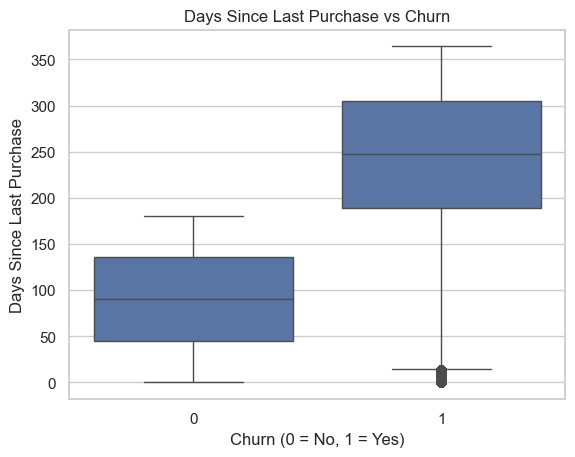

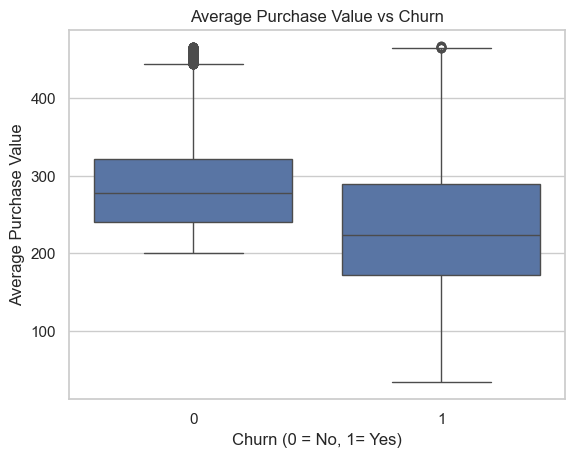

In [20]:
# Visualize churn vs. days since last 
sns.boxplot(data=df, x='czy_churn', y='dni_od_ostatniego_zakupu')
plt.title("Days Since Last Purchase vs Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Days Since Last Purchase")
plt.show()

# Visualize churn vs. average purchase value
sns.boxplot(data=df, x='czy_churn', y = 'średnia_wartość_zakupu')
plt.title("Average Purchase Value vs Churn")
plt.xlabel("Churn (0 = No, 1= Yes)")
plt.ylabel("Average Purchase Value")
plt.show()

#### Relationship Between Features and Churn

 - **Days Since Last Purchase**: Churned customers have significantly higher values, indicating longer inactivity before leaving.
 - **Average Purchase Value**: Churned users tend to spend less on avergae compared to retained customers.

 Overall both variables show meaningful and may serve as strong predictiors of churn.